In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras
import sys
import cv2
import os
import PIL
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Download the heart disease dataset from UCI ML Repository
heart_data = pd.read_csv("/content/heart 2.csv")
names = ["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope", "HeartDisease"]

heart_data = pd.concat([heart_data] * 5, ignore_index=True)

# Display the first few rows of the dataset
heart_data.head()
heart_data.tail()


In [ ]:
# Display basic information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1836 non-null   int64  
 1   Sex             1836 non-null   object 
 2   ChestPainType   1836 non-null   object 
 3   RestingBP       1836 non-null   int64  
 4   Cholesterol     1836 non-null   int64  
 5   FastingBS       1836 non-null   int64  
 6   RestingECG      1836 non-null   object 
 7   MaxHR           1836 non-null   int64  
 8   ExerciseAngina  1836 non-null   object 
 9   Oldpeak         1836 non-null   float64
 10  ST_Slope        1836 non-null   object 
 11  HeartDisease    1836 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 172.2+ KB


In [ ]:
print (heart_data.loc[1])

Age                   49
Sex                    F
ChestPainType        NAP
RestingBP            160
Cholesterol          180
FastingBS              0
RestingECG        Normal
MaxHR                156
ExerciseAngina         N
Oldpeak              1.0
ST_Slope            Flat
HeartDisease           1
Name: 1, dtype: object


In [ ]:
# Check for missing values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Display descriptive statistics
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.430046,18.509109,109.354336,0.422930,25.453396,1.066279,0.497278
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
def augment_data(data):
    augmented_data = data.copy()
    # Add noise to numerical features
    numerical_features = ["RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
    for feature in numerical_features:
        noise = np.random.normal(0, 0.1, size=len(data))
        augmented_data[feature] += noise

    # Flip binary features
    binary_features = ["RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
    for feature in binary_features:
        augmented_data[feature] = 1 - augmented_data[feature]

    return augmented_data

In [ ]:
# Augment the dataset
heart_data = augment_data(heart_data)

In [ ]:
print(heart_data.head())

   Age Sex ChestPainType   RestingBP  Cholesterol  FastingBS RestingECG  \
0   40   M           ATA -139.129161  -288.125615   1.203805     Normal   
1   49   F           NAP -158.999173  -179.046354   0.906120     Normal   
2   37   M           ATA -129.254609  -282.088242   0.902430         ST   
3   48   F           ASY -136.916858  -213.251870   0.941378     Normal   
4   54   M           NAP -149.193977  -193.836026   1.212820     Normal   

        MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0 -170.907717              N  0.843083       Up             0  
1 -155.110544              N  0.030150     Flat             1  
2  -97.104181              N  1.032752       Up             0  
3 -106.900640              Y -0.338654     Flat             1  
4 -120.968974              N  1.045344       Up             0  


In [ ]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,53.510893,-131.397527,-197.798583,0.759948,-135.811932,0.112634,0.553377
std,9.430046,18.511323,109.354600,0.430241,25.459904,1.068965,0.497278
min,28.000000,-199.216018,-601.913383,-0.335240,-201.015303,-5.259999,0.000000
25%,47.000000,-139.147940,-265.922883,0.781879,-154.906027,-0.559226,0.000000
50%,54.000000,-129.055943,-221.810509,0.952833,-137.049658,0.414761,1.000000
75%,60.000000,-119.004771,-172.041923,1.032217,-118.851823,0.985130,1.000000
max,77.000000,1.011343,1.322357,1.294573,-59.110340,3.755049,1.000000


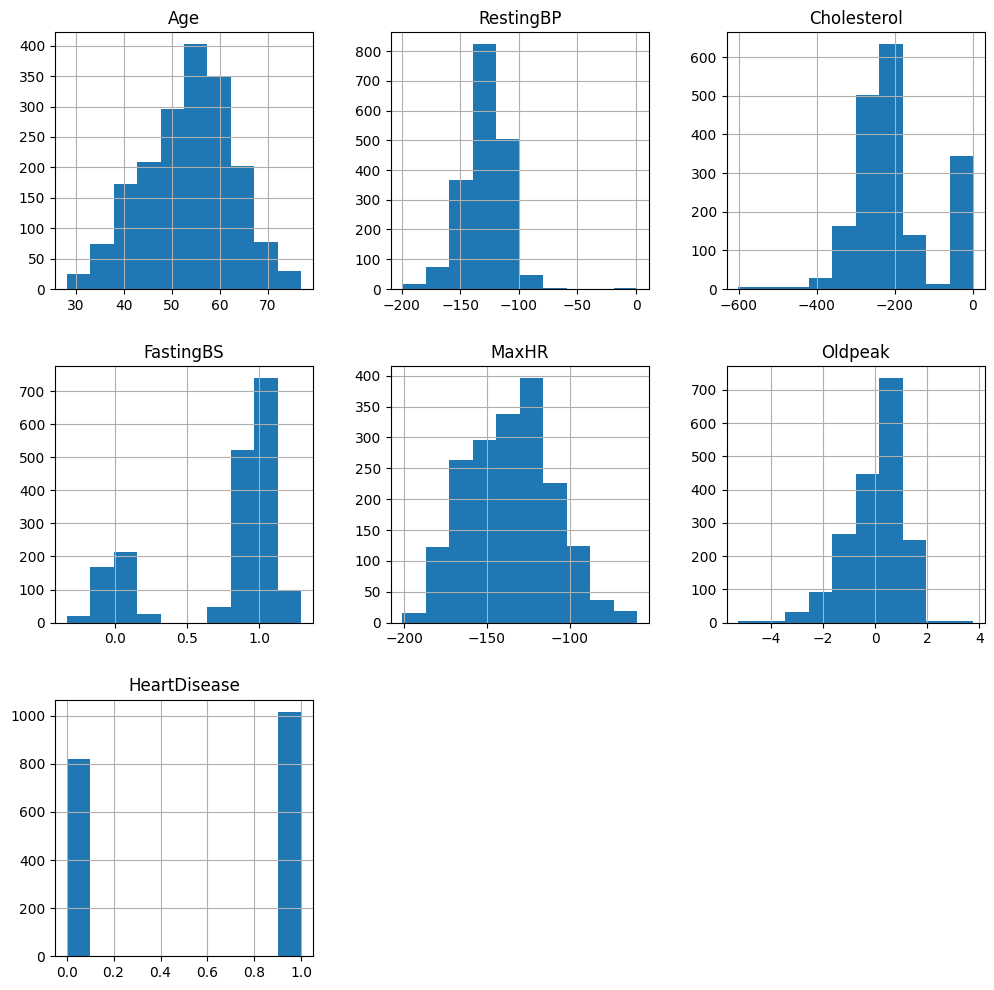

In [ ]:
# plot histograms for each variable
heart_data.hist(figsize = (12, 12))
plt.show()

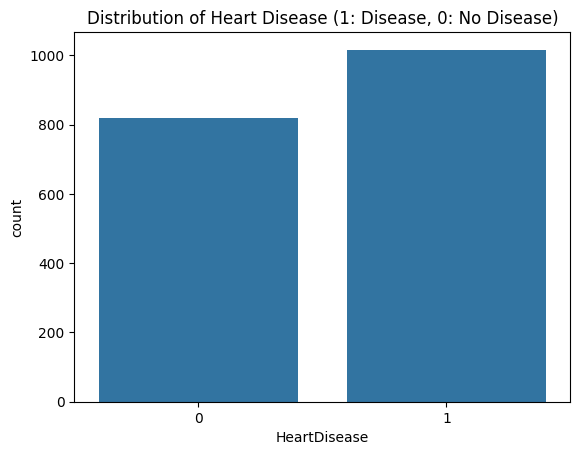

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x="HeartDisease", data = heart_data)
plt.title("Distribution of Heart Disease (1: Disease, 0: No Disease)")
plt.show()

In [ ]:
print(heart_data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
print(heart_data.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


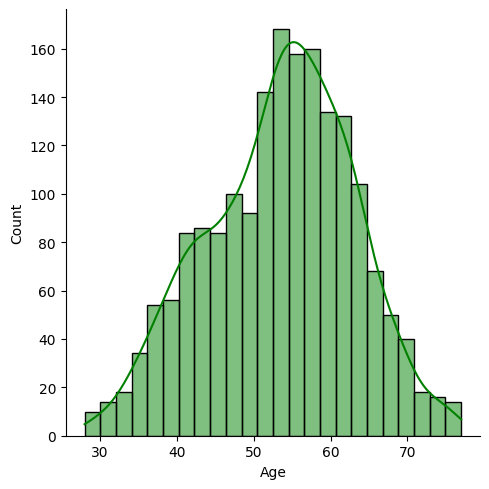

In [ ]:
sns.displot(heart_data['Age'], kde = True, color = 'Green')

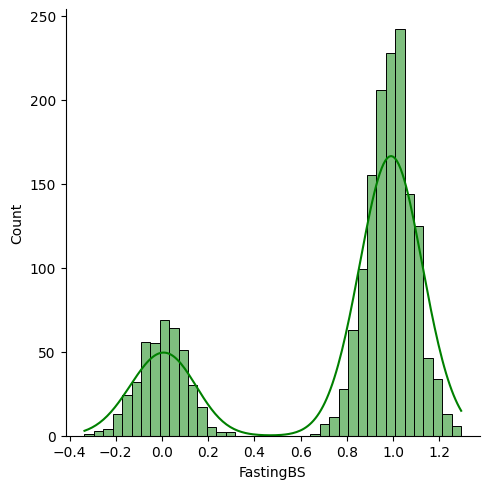

In [ ]:
sns.displot(x = heart_data['FastingBS'], kde = True, color = 'Green')

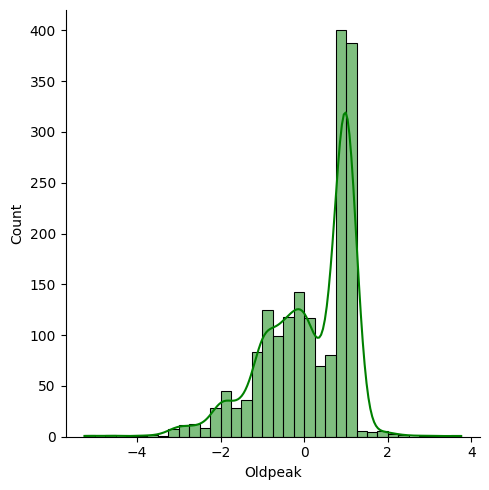

In [ ]:
sns.displot(heart_data['Oldpeak'], kde = True, color = 'Green')

<Axes: >

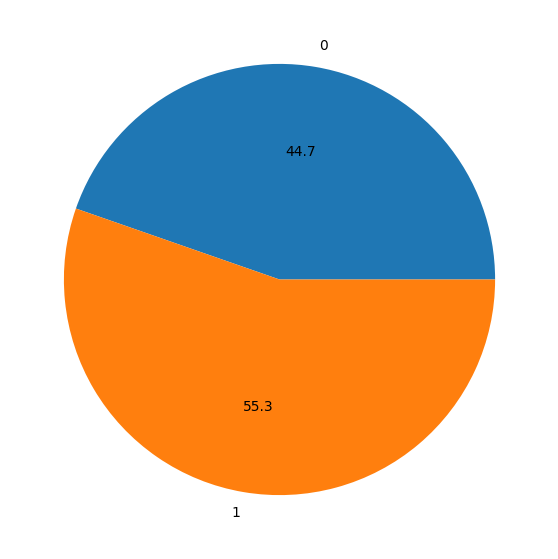

In [ ]:
heart_data.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.1f', figsize = (7,7))

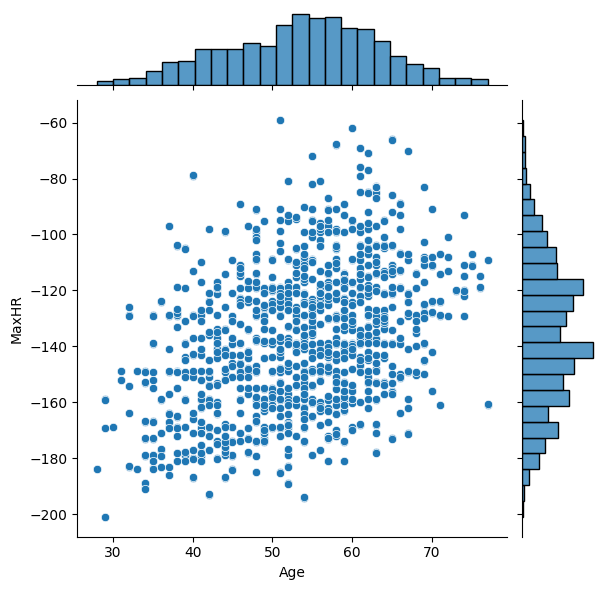

In [ ]:
sns.jointplot(x = 'Age' , y = 'MaxHR', data = heart_data, kind = 'scatter')

In [ ]:
# Convert into two parts
X = heart_data[["RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak",]]
y = heart_data["HeartDisease"]

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((1468, 5), (368, 5))

In [ ]:
#%% one-hot-encoding
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)

In [ ]:
inputs = keras.layers.Input(shape=(X_train.shape[1],1))
RS0    = keras.layers.Reshape((X_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)


FC2 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)
outputs = keras.layers.Activation('softmax')(FC2)

myMLP = keras.Model(inputs=inputs,outputs=outputs)
myMLP.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 512)               3072      
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                             

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Convert data types if necessary
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')

# Define class weights
class_weight = {0: 1, 1: 10}

# Fit the model
myMLP.fit(X_train, y_train, epochs=100, batch_size=500, verbose=1, class_weight=class_weight)

Epoch 1/100
3/3 [==============================] - 1s 18ms/step - loss: 2.5596 - accuracy: 0.5824
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 2.0158 - accuracy: 0.6587
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.6875 - accuracy: 0.6322
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 1.5539 - accuracy: 0.5947
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 1.5402 - accuracy: 0.5702
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 1.4454 - accuracy: 0.5756
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 1.4487 - accuracy: 0.5756
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 1.4259 - accuracy: 0.5811
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 1.3815 - accuracy: 0.5838
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 1.4378 - accuracy: 0.5838
Epoch 11/100
3/3 [=

In [ ]:
restBP = float(input("Enter your Resting Blood Pressure :" ))
chol = float(input("Enter your Cholestrol Level :" ))
fastBS = float(input("Enter your Fasting Blood Sugar :" ))
maxH = float(input("Enter your Max Heart Rate :" ))
oldP = float(input("Enter your Oldpeak situation : "))

Enter your Resting Blood Pressure :110
Enter your Cholestrol Level :264
Enter your Fasting Blood Sugar :100
Enter your Max Heart Rate :89
Enter your Oldpeak situation : 1.2


In [ ]:
finalX_pred = np.array([[restBP, chol, fastBS, maxH, oldP]])
heart_condition = myMLP.predict(finalX_pred)

print('Predicted heart health:',heart_condition*100,"%")

1/1 [==============================] - 0s 21ms/step
Predicted heart condition: 0
